<a href="https://colab.research.google.com/github/lintabong/Artificial-Intelligence/blob/main/Mask-RCNN/eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import output

!pip install tensorflow==1.13.1
!pip install keras==2.0.8
!pip install h5py==2.10.0

output.clear()

In [2]:
target            = 'new_ex_occ4'

dir_rgb           = '/content/drive/MyDrive/01MaskRCNN/eval/' + target + '/rgb/'
dir_d             = '/content/drive/MyDrive/01MaskRCNN/eval/' + target + '/depth/'
init              = '/content/drive/MyDrive/01MaskRCNN/eval/' + target +'/'+ target + '.txt'

In [3]:
!git clone https://github.com/matterport/Mask_RCNN.git

import os
os.chdir('Mask_RCNN/samples')

import sys
import random
import math
import cv2
import time
import skimage.io
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
from collections import Counter
from numpy.linalg import norm
from skimage.color.colorconv import convert_colorspace
from scipy import spatial
from google.colab import drive
from google.colab.patches import cv2_imshow

drive.mount('/content/drive')

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

output.clear()

In [4]:
# Membuka file ground truth
with open(init) as f:
 lines = f.read().splitlines()

print("jumlah baris:", len(lines))

ground_truth = []

for i in range(len(lines)):
  if lines[i].split(',')[0] != 'NaN':
    x = int(lines[i].split(',')[0])
    y = int(lines[i].split(',')[1])
    w = int(lines[i].split(',')[2])
    h = int(lines[i].split(',')[3])

  ground_truth.append([x, y, w, h])

print(ground_truth)

jumlah baris: 51
[[109, 214, 84, 267], [116, 214, 84, 267], [131, 214, 84, 267], [133, 214, 84, 267], [151, 220, 83, 258], [163, 220, 83, 258], [177, 226, 84, 251], [182, 226, 84, 251], [193, 228, 84, 251], [206, 230, 76, 249], [225, 228, 76, 249], [233, 227, 76, 249], [248, 227, 76, 249], [257, 228, 76, 249], [264, 234, 76, 249], [275, 231, 76, 249], [289, 231, 76, 249], [294, 231, 76, 249], [302, 230, 76, 245], [309, 230, 76, 245], [331, 231, 69, 244], [339, 228, 69, 244], [352, 230, 69, 244], [364, 230, 69, 244], [370, 237, 69, 241], [378, 236, 54, 238], [384, 238, 43, 236], [386, 309, 36, 149], [386, 309, 36, 149], [386, 309, 36, 149], [386, 309, 36, 149], [473, 247, 37, 226], [464, 242, 46, 231], [458, 246, 61, 230], [458, 246, 69, 231], [468, 247, 69, 231], [477, 252, 67, 226], [483, 252, 67, 226], [486, 249, 67, 226], [501, 248, 67, 226], [501, 248, 67, 226], [519, 249, 56, 225], [519, 249, 56, 225], [533, 250, 56, 225], [539, 256, 55, 219], [543, 255, 55, 219], [552, 255, 55, 2

In [5]:
# Mencari jumlah gambar

list_img = os.listdir(dir_rgb)
number_files = len(list_img)
print("jumlah gambar:", number_files)
print(" ")

for r, d, f in os.walk(dir_rgb):
  print(f)

img_rgb     = [""]*len(f)

arrimg      = []
for i in range(len(f)):
  nameimg = f[i].split('-')[2]
  if len(f[i].split('-')[2]) == 5:
    nameimg = "00" + f[i].split('-')[2]
  if len(f[i].split('-')[2]) == 6:
    nameimg = "0" + f[i].split('-')[2]

  arrimg.append(nameimg)

sorted_arrimg = sorted(arrimg)
print(sorted_arrimg)

for i in range(len(arrimg)):
  if sorted_arrimg[i][0] == "0" and sorted_arrimg[i][1] == "0":
    get_val = sorted_arrimg[i][2:7]
    sorted_arrimg[i] = get_val
  if sorted_arrimg[i][0] == "0" and sorted_arrimg[i][1] != "0":
    get_val = sorted_arrimg[i][1:7]
    sorted_arrimg[i] = get_val

# Final Index
for i in range(len(sorted_arrimg)):
  for o in range(len(f)):
    if sorted_arrimg[i] == f[o].split('-')[2]:
      img_rgb[i] = f[o]

print(img_rgb)
print(" ")

## end rgb image

for r, d, f in os.walk(dir_d):
  print(f)

img_d       = [""]*len(f)

arrimg      = []
for i in range(len(f)):
  nameimg = f[i].split('-')[2]
  if len(f[i].split('-')[2]) == 5:
    nameimg = "00" + f[i].split('-')[2]
  if len(f[i].split('-')[2]) == 6:
    nameimg = "0" + f[i].split('-')[2]

  arrimg.append(nameimg)

sorted_arrimg = sorted(arrimg)
print(sorted_arrimg)

for i in range(len(arrimg)):
  if sorted_arrimg[i][0] == "0" and sorted_arrimg[i][1] == "0":
    get_val = sorted_arrimg[i][2:7]
    sorted_arrimg[i] = get_val
  if sorted_arrimg[i][0] == "0" and sorted_arrimg[i][1] != "0":
    get_val = sorted_arrimg[i][1:7]
    sorted_arrimg[i] = get_val

# Final Index
for i in range(len(sorted_arrimg)):
  for o in range(len(f)):
    if sorted_arrimg[i] == f[o].split('-')[2]:
      img_d[i] = f[o]

print(img_d)

jumlah gambar: 51
 
['r-600086-13.png', 'r-200029-5.png', 'r-333381-8.png', 'r-100015-3.png', 'r-300043-7.png', 'r-33338-2.png', 'r-500072-11.png', 'r-533410-12.png', 'r-133353-4.png', 'r-0-1.png', 'r-400058-9.png', 'r-233367-6.png', 'r-433396-10.png', 'r-700101-15.png', 'r-1200173-25.png', 'r-1033482-22.png', 'r-1433540-29.png', 'r-933468-20.png', 'r-1100158-23.png', 'r-1333525-27.png', 'r-1500216-30.png', 'r-633425-14.png', 'r-833453-18.png', 'r-1000144-21.png', 'r-733439-16.png', 'r-1366863-28.png', 'r-1166835-24.png', 'r-900130-19.png', 'r-800115-17.png', 'r-1266849-26.png', 'r-1833597-37.png', 'r-1800259-36.png', 'r-2133640-43.png', 'r-1533554-31.png', 'r-1733583-35.png', 'r-2100302-42.png', 'r-1600230-32.png', 'r-2000288-40.png', 'r-1900273-38.png', 'r-2300331-46.png', 'r-1700245-34.png', 'r-1633568-33.png', 'r-2200316-44.png', 'r-1933611-39.png', 'r-2033626-41.png', 'r-2233655-45.png', 'r-2533698-51.png', 'r-2433683-49.png', 'r-2500360-50.png', 'r-2333669-47.png', 'r-2400345-48.

In [6]:
class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
# config.display()

In [ ]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

In [8]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

# Histogram Detail

In [ ]:
n_img = 20

# ================================= no edit ================================= #
image       = skimage.io.imread(os.path.join(dir_rgb + img_rgb[n_img]))

result_axes = []

# Run detection
results = model.detect([image], verbose=1)
r = results[0]

img  = cv2.imread(dir_rgb + img_rgb[n_img])

print(len(r['rois']), type(r['rois']))
print(r['rois'], r['class_ids'])

for o in range(len(r['rois'])):
  y1 = r['rois'][o][1]
  x1 = r['rois'][o][0]
  y2 = r['rois'][o][3]
  x2 = r['rois'][o][2]

  result_axes.append([y1, x1, y2, x2])

for o in range(len(r['rois'])):
  crop = img[result_axes[o][1]:result_axes[o][3],result_axes[o][0]:result_axes[o][2]]
  cv2.imwrite('single-'+ str(n_img) + '-' + str(o) + '.png', crop)
  # cv2_imshow(crop)


Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
5 <class 'numpy.ndarray'>
[[151 456 472 575]
 [246 339 470 407]
 [320 452 387 473]
 [322 466 392 492]
 [226 460 325 543]] [ 1  1  1  1 27]


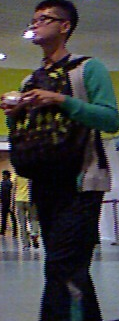

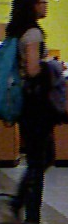

In [ ]:
rgb0 = cv2.imread('single-20-0.png')
rgb1 = cv2.imread('single-20-1.png')

cv2_imshow(rgb0)
cv2_imshow(rgb1)

In [ ]:
def L2Norm(H1,H2):
    distance =0
    for i in range(len(H1)):
        distance += np.square(H1[i]-H2[i])
    return np.sqrt(distance)

ri1     = Image.open('single-20-0.png')
ri1_arr = np.asarray(ri1)
fa1     = ri1_arr.flatten()

ri2     = Image.open('single-20-1.png')
ri2_arr = np.asarray(ri2)
fa2     = ri2_arr.flatten()

RH1 = Counter(fa1)
RH2 = Counter(fa2)

H1 = []
for i in range(256):
    if i in RH1.keys():
        H1.append(RH1[i])
    else:
        H1.append(0)

print(H1)

H2 = []
for i in range(256):
    if i in RH2.keys():
        H2.append(RH2[i])
    else:
        H2.append(0)

print(L2Norm(H1,H2))

[1871, 1403, 2126, 2661, 2747, 2520, 2445, 2430, 2255, 2224, 2036, 1843, 1708, 1583, 1396, 1331, 1221, 986, 1029, 944, 796, 777, 811, 722, 727, 671, 702, 639, 671, 691, 619, 621, 560, 540, 549, 548, 498, 497, 486, 461, 465, 432, 420, 416, 403, 401, 391, 380, 381, 392, 355, 354, 342, 366, 332, 360, 336, 358, 342, 318, 323, 365, 329, 332, 334, 330, 326, 331, 325, 320, 314, 334, 337, 312, 338, 348, 378, 346, 419, 390, 448, 486, 556, 619, 680, 731, 802, 872, 851, 864, 908, 911, 878, 955, 881, 828, 763, 709, 725, 668, 698, 650, 649, 654, 665, 694, 677, 657, 665, 625, 651, 622, 608, 634, 664, 674, 758, 780, 849, 874, 891, 925, 880, 880, 848, 838, 813, 739, 707, 698, 630, 607, 602, 555, 513, 597, 496, 427, 496, 419, 400, 367, 358, 290, 321, 279, 270, 278, 252, 236, 225, 239, 210, 223, 196, 191, 178, 161, 171, 169, 161, 166, 179, 148, 134, 141, 124, 97, 90, 95, 102, 84, 71, 79, 86, 60, 74, 56, 77, 49, 49, 37, 62, 39, 55, 40, 35, 40, 37, 36, 35, 28, 33, 33, 35, 29, 36, 18, 25, 25, 20, 22, 27, 2

In [ ]:
# print rgb dari array image untuk titik (0,0) (0,1) dan (0,2)
# lalu print print rgb yang sudah di flatten (dari array 3d menjadi 2d)

print('array 3d rgb:')
for i in range(3):
  print(ri1_arr[0][i])

print(' ')
print('flatten array (3d => 2d):')
print(fa1)
print(' ')
for i in range(10):
  print(fa1[i])

array 3d rgb:
[85 82 89]
[85 84 92]
[86 84 98]
 
flatten array (3d => 2d):
[85 82 89 ... 14 16 41]
 
85
82
89
85
84
92
86
84
98
84


# Average Precission

Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
5 <class 'numpy.ndarray'>
[[151 456 472 575]
 [246 339 470 407]
 [320 452 387 473]
 [322 466 392 492]
 [226 460 325 543]] [ 1  1  1  1 27]


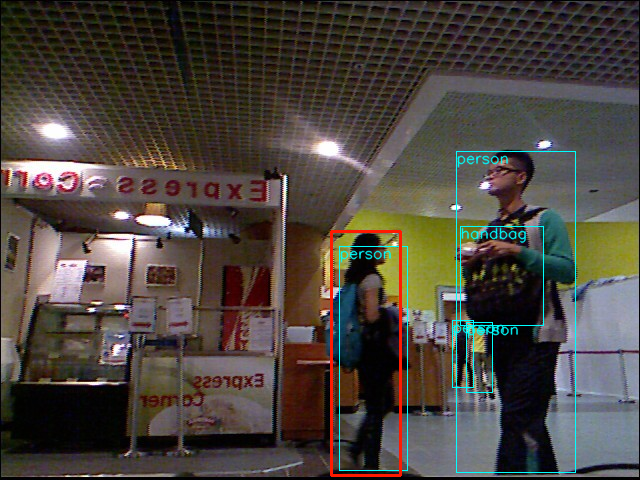

In [10]:
n_img = 20

# ================================= no edit ================================= #
image           = skimage.io.imread(os.path.join(dir_rgb + img_rgb[n_img]))
font            = cv2.FONT_HERSHEY_SIMPLEX
font_size       = 0.5
font_color      = (255,255,0)
font_thickness  = 1

# Run detection
results = model.detect([image], verbose=1)
r = results[0]

img  = cv2.imread(dir_rgb + img_rgb[n_img])
imgd = cv2.imread(dir_d + img_d[n_img])

print(len(r['rois']), type(r['rois']))
print(r['rois'], r['class_ids'])

# image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset, config, image_id)
# ap_, prec_, recall_, overlap_ = utils.compute_ap(gt_bbox, gt_class_id, gt_mask, r['rois'], r['class_ids'], r['scores'], r['masks'])

for i in range(len(r['rois'])):
  x = r['rois'][i][1]
  y = r['rois'][i][0] + 12
  text = class_names[r['class_ids'][i]]

  img_text = cv2.putText(img, text, (x,y), font, font_size, font_color, font_thickness, cv2.LINE_AA)
  cv2.rectangle(img, (r['rois'][i][1], r['rois'][i][0]), (r['rois'][i][3], r['rois'][i][2]), (255, 255, 0), 1)

cv2.rectangle(img, (ground_truth[n_img][0], ground_truth[n_img][1]), (ground_truth[n_img][2] + ground_truth[n_img][0], ground_truth[n_img][3] + ground_truth[n_img][1]), (0, 26, 255), 2)

cv2_imshow(img)

# RGBD

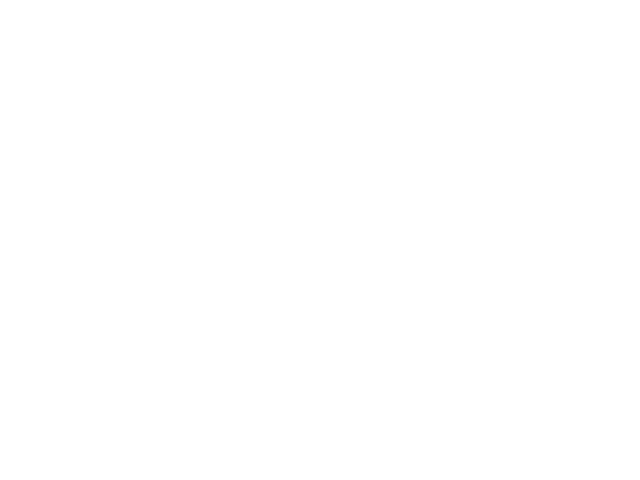

In [19]:
n_img = 0

img  = cv2.imread(dir_rgb + img_rgb[n_img])
imgd = cv2.imread(dir_d + img_d[n_img])

# cv2_imshow(img)
# cv2_imshow(imgd)

blank_image = np.zeros(shape=[img.shape[0], img.shape[1], 4], dtype=np.uint8)
cv2_imshow(blank_image)

# Single Object Detection (RGB + Depth)

Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
3 <class 'numpy.ndarray'>
[[178 550 465 640]
 [301 460 412 502]
 [223 103 475 196]] [1 1 1]


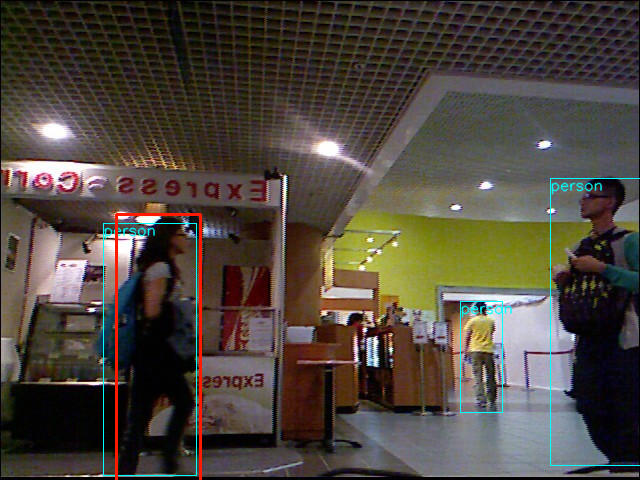

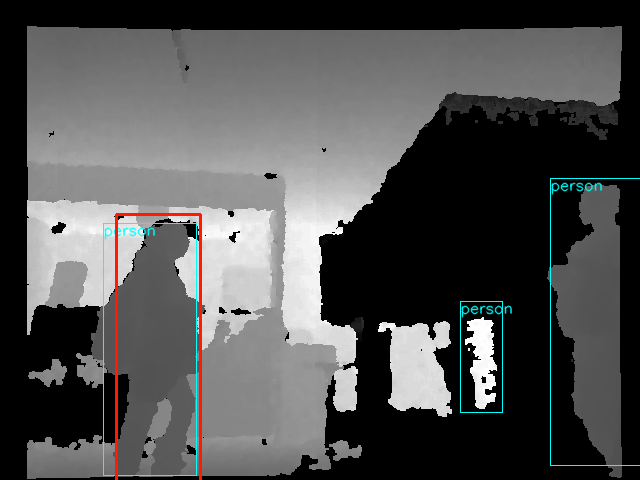

In [9]:
n_img = 1

# ================================= no edit ================================= #
image           = skimage.io.imread(os.path.join(dir_rgb + img_rgb[n_img]))
font            = cv2.FONT_HERSHEY_SIMPLEX
font_size       = 0.5
font_color      = (255,255,0)
font_thickness  = 1

# Run detection
results = model.detect([image], verbose=1)
r = results[0]

img  = cv2.imread(dir_rgb + img_rgb[n_img])
imgd = cv2.imread(dir_d + img_d[n_img])

print(len(r['rois']), type(r['rois']))
print(r['rois'], r['class_ids'])

for i in range(len(r['rois'])):
  x = r['rois'][i][1]
  y = r['rois'][i][0] + 12
  text = class_names[r['class_ids'][i]]

  img_text = cv2.putText(img, text, (x,y), font, font_size, font_color, font_thickness, cv2.LINE_AA)
  img_text = cv2.putText(imgd, text, (x,y), font, font_size, font_color, font_thickness, cv2.LINE_AA)
  
  cv2.rectangle(img, (r['rois'][i][1], r['rois'][i][0]), (r['rois'][i][3], r['rois'][i][2]), (255, 255, 0), 1)
  cv2.rectangle(imgd, (r['rois'][i][1], r['rois'][i][0]), (r['rois'][i][3], r['rois'][i][2]), (255, 255, 0), 1)

cv2.rectangle(img, (ground_truth[n_img][0], ground_truth[n_img][1]), (ground_truth[n_img][2] + ground_truth[n_img][0], ground_truth[n_img][3] + ground_truth[n_img][1]), (0, 26, 255), 2)
cv2.rectangle(imgd, (ground_truth[n_img][0], ground_truth[n_img][1]), (ground_truth[n_img][2] + ground_truth[n_img][0], ground_truth[n_img][3] + ground_truth[n_img][1]), (0, 26, 255), 2)

cv2_imshow(img)
cv2_imshow(imgd)

# Video Detection + Tracking (v.01) Matching Template



frame- 1
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1 63  1 59  1 73 42] result: 8
cnn 1 : false 0
cnn 2 : true 47


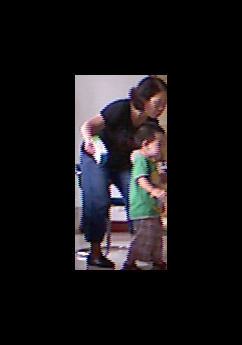

193 139 285 334
frame- 2
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1 59 63  1 73] result: 7
cnn 1 : false 0
cnn 2 : false 248
cnn 3 : false 0


error: ignored

In [ ]:
max_frame   = 51
treshold    = 0.4
simi_start  = 1
simi_end    = 50

# ================================= no edit ================================= #
from skimage.color.colorconv import convert_colorspace

axes_export = []
result_axes = []
a = 0
b = 0
c = 0
d = 0

# inisiasi box awal
cust_img    = cv2.imread(dir_rgb + img_rgb[0])
gt0         = ground_truth[0]
cut_img     = cust_img[gt0[1]: gt0[1] + gt0[3],gt0[0]: gt0[0] + gt0[2]]

cv2.imwrite('tracker.png', cut_img)
# end inisiasi

for i in range(max_frame):
  print('frame-', i+1)

  # Run detection
  image = skimage.io.imread(dir_rgb + img_rgb[i])
  results = model.detect([image], verbose=1)
  r = results[0]
  # end detection

  for o in range(len(r['rois'])):
    y1 = r['rois'][o][1]
    x1 = r['rois'][o][0]
    y2 = r['rois'][o][3]
    x2 = r['rois'][o][2]

    result_axes.append([y1, x1, y2, x2])
    
  print(r['class_ids'], 'result: ' + str(o + 1))

  # MAIN FUNCTION TRACKING
  img = cv2.imread(dir_rgb + img_rgb[i])

  for o in range(len(r['rois'])):
    crop = img[result_axes[o][1]:result_axes[o][3],result_axes[o][0]:result_axes[o][2]]

    blank = np.zeros(shape=[crop.shape[0], 75, crop.shape[2]], dtype=np.uint8)
    crop = cv2.hconcat([blank, crop])
    crop = cv2.hconcat([crop,blank])

    blank = np.zeros(shape=[75, crop.shape[1], crop.shape[2]], dtype=np.uint8)
    crop = cv2.vconcat([blank, crop])
    crop = cv2.vconcat([crop, blank])

    cv2.imwrite('crop'+ str(o) + '.png', crop)
    # cv2_imshow(crop)
    
  for o in range(len(r['rois'])):
    img_track = cv2.imread('crop'+ str(o) + '.png')
    grey_img  = cv2.cvtColor(img_track, cv2.COLOR_BGR2GRAY)

    template = cv2.imread('tracker.png', 0)
    # template = cv2.resize(template, (img_track.shape[1], img_track.shape[0]))

    res = cv2.matchTemplate(grey_img, template, cv2.TM_CCOEFF_NORMED)
    loc = np.where(res >= treshold)

    detectio = 0
    for pt in zip(*loc[::-1]):
      detectio = detectio + 1

    try:
      if simi_start <= detectio <= simi_end:
        print('cnn ' + str(o + 1) + ' :', 'true', detectio)
        a = result_axes[o][0]
        b = result_axes[o][1]
        c = result_axes[o][2]
        d = result_axes[o][3]
        cv2_imshow(img_track)
        break
      else:
        print('cnn ' + str(o + 1) + ' :', 'false', detectio)
    except:
      pass

  for o in range(len(r['rois'])):
    result_axes.pop(0)
    try:
      os.remove('crop' + str(o) + '.png')
    except OSError:
      pass
      
  cust_img    = cv2.imread(dir_rgb + img_rgb[i])
  cut_img     = cust_img[b:d, a:c]

  cv2.imwrite('tracker.png', cut_img)
  print(a, b, c, d)

  axes_export.append([a, b, c-a, d-b])

  print("=========================================================================================================")

  # END TRACKING FUNCTION

# Video Detection + Output Video

In [ ]:
max_frame     = 20
fps           = 7
output_video  = '/content/drive/MyDrive/01MaskRCNN/video_output/try2.avi'

# ================================= no edit ================================= #
img           = cv2.imread(dir_rgb + img_rgb[0])
frameSize     = (img.shape[1], img.shape[0])

out = cv2.VideoWriter(output_video,cv2.VideoWriter_fourcc(*'DIVX'), fps, frameSize)

font            = cv2.FONT_HERSHEY_SIMPLEX
font_size       = 0.5
font_color      = (255,255,0)
font_thickness  = 1

for u in range(max_frame):
  print('frame-' + str(u + 1))
  image = skimage.io.imread(os.path.join(dir_rgb + img_rgb[u]))

  results = model.detect([image], verbose=1)
  r = results[0]

  img = cv2.imread(dir_rgb + img_rgb[u])

  for i in range(len(r['rois'])):
    x = r['rois'][i][1]
    y = r['rois'][i][0] + 12
    text = class_names[r['class_ids'][i]]

    img_text = cv2.putText(img, text, (x,y), font, font_size, font_color, font_thickness, cv2.LINE_AA)

    cv2.rectangle(img, (r['rois'][i][1], r['rois'][i][0]), (r['rois'][i][3], r['rois'][i][2]), (255, 255, 0), 1)

  cv2.rectangle(img, (ground_truth[u][0], ground_truth[u][1]), (ground_truth[u][2] + ground_truth[u][0], ground_truth[u][3] + ground_truth[u][1]), (0, 26, 255), 2)
  out.write(img)
  output.clear()

out.release()

In [ ]:
# image rgb + depth

max_frame     = 51
fps           = 7
output_video  = '/content/drive/MyDrive/01MaskRCNN/video_output/try3.avi'

# ================================= no edit ================================= #
img           = cv2.imread(dir_rgb + img_rgb[0])
frameSize     = (img.shape[1], img.shape[0])

out = cv2.VideoWriter(output_video,cv2.VideoWriter_fourcc(*'DIVX'), fps, frameSize)

font            = cv2.FONT_HERSHEY_SIMPLEX
font_size       = 0.5
font_color      = (255,255,0)
font_thickness  = 1

for u in range(max_frame):
  print('frame-' + str(u + 1))
  image = skimage.io.imread(os.path.join(dir_rgb + img_rgb[u]))

  results = model.detect([image], verbose=1)
  r = results[0]

  # img = cv2.imread(dir_rgb + img_rgb[u])
  myrgb   = cv2.imread(dir_rgb + img_rgb[u])
  mydepth = cv2.imread(dir_d + img_d[u])

  img = cv2.addWeighted(myrgb, 1, mydepth, 0.6,1)

  for i in range(len(r['rois'])):
    x = r['rois'][i][1]
    y = r['rois'][i][0] + 12
    text = class_names[r['class_ids'][i]]

    img_text = cv2.putText(img, text, (x,y), font, font_size, font_color, font_thickness, cv2.LINE_AA)

    cv2.rectangle(img, (r['rois'][i][1], r['rois'][i][0]), (r['rois'][i][3], r['rois'][i][2]), (255, 255, 0), 1)

  cv2.rectangle(img, (ground_truth[u][0], ground_truth[u][1]), (ground_truth[u][2] + ground_truth[u][0], ground_truth[u][3] + ground_truth[u][1]), (0, 26, 255), 2)
  out.write(img)
  output.clear()

out.release()

# Video Detection + Tracking (v.02) Histogram

frame- 1
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1 27 25] result: 5
        name           val    a    b    c    d
2  crop2.png    322.781660  108  214  194  477
0  crop0.png   6596.533332  552  179  640  468
4  crop4.png   8353.607783   88  267  145  374
3  crop3.png   8576.000000  558  242  626  340
1  crop1.png  10264.735847  460  302  502  411


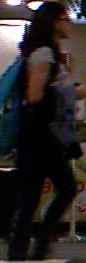

108 214 194 477
frame- 2
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[1 1 1] result: 3
        name           val    a    b    c    d
2  crop2.png    888.674294  103  223  196  475
0  crop0.png   6240.744186  550  178  640  465
1  crop1.png  10131.522196  460  301  502  412


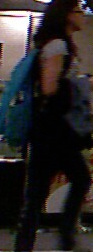

103 223 196 475
frame- 3
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1 27] result: 4
        name           val    a    b    c    d
2  crop2.png   1454.154737  119  250  226  472
0  crop0.png   6316.500613  548  173  640  450
3  crop3.png   9706.426840  108  271  157  369
1  crop1.png  10666.163415  460  302  502  409


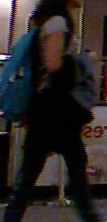

119 250 226 472
frame- 4
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[1 1 1] result: 3
        name          val    a    b    c    d
2  crop2.png  2130.044835  118  245  253  478
0  crop0.png  6322.821364  547  175  639  471
1  crop1.png  9986.384231  462  301  502  409


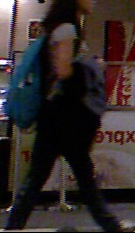

118 245 253 478
frame- 5
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1 25 29] result: 5
        name           val    a    b    c    d
2  crop2.png   1053.788878  128  252  259  478
0  crop0.png   6769.413195  540  177  639  471
4  crop4.png  10412.592713  368  313  444  413
3  crop3.png  11347.181544  570  224  626  259
1  crop1.png  11464.905800  466  301  502  410


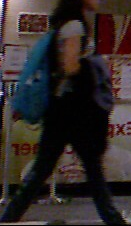

128 252 259 478
frame- 6
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1 57 27] result: 5
        name           val    a    b    c    d
1  crop1.png   1082.568243  132  242  266  479
0  crop0.png   6425.663234  538  170  640  477
4  crop4.png   9103.304785  546  240  612  338
3  crop3.png  10602.129267  318  227  381  322
2  crop2.png  10692.833862  468  301  502  410


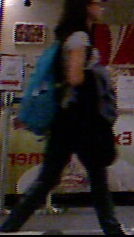

132 242 266 479
frame- 7
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1 66 25] result: 5
        name           val    a    b    c    d
2  crop2.png   1455.229879  157  233  269  478
0  crop0.png   6357.194192  533  170  639  473
4  crop4.png  10052.666164  168  281  221  374
1  crop1.png  11124.691951  466  301  503  406
3  crop3.png  11433.962961  547  239  562  258


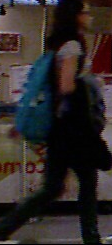

157 233 269 478
frame- 8
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1 66  1] result: 5
        name           val    a    b    c    d
2  crop2.png    765.446928  162  230  277  477
0  crop0.png   5782.798025  529  169  638  472
1  crop1.png  10141.290549  467  301  501  405
4  crop4.png  10341.674042  459  320  477  382
3  crop3.png  10413.373373  544  240  559  259


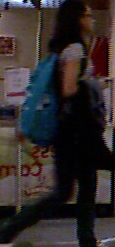

162 230 277 477
frame- 9
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1 66 25 57] result: 6
        name           val    a    b    c    d
2  crop2.png   2870.425927  200  229  286  469
0  crop0.png   5456.169810  523  167  637  470
4  crop4.png   8876.074639  193  280  246  376
1  crop1.png   9922.370130  467  301  502  403
5  crop5.png   9958.304022  320  269  380  324
3  crop3.png  10232.814325  537  242  553  259


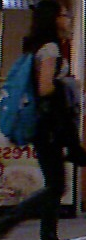

200 229 286 469
frame- 10
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1 25 57] result: 5
        name          val    a    b    c    d
2  crop2.png   744.808700  210  222  292  476
0  crop0.png  5628.335189  521  166  636  471
3  crop3.png  6311.502515  201  273  249  376
1  crop1.png  7352.954100  468  302  502  406
4  crop4.png  7412.780990  320  267  381  323


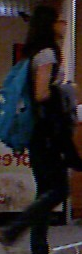

210 222 292 476
frame- 11
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1 57 29 42 27] result: 7
        name          val    a    b    c    d
2  crop2.png   918.288626  227  222  305  476
0  crop0.png  5355.014099  515  167  635  471
6  crop6.png  5625.901083  526  234  603  337
4  crop4.png  5904.972820  131  344  245  454
1  crop1.png  7673.141534  469  303  502  406
3  crop3.png  7771.434745  322  269  382  320
5  crop5.png  7956.234097  297  327  316  344


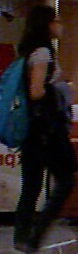

227 222 305 476
frame- 12
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1  1 25 57] result: 6
        name          val    a    b    c    d
1  crop1.png   890.380256  229  222  314  479
0  crop0.png  5487.442938  511  166  633  471
4  crop4.png  6144.139972  222  269  278  374
2  crop2.png  8037.463406  469  303  502  405
5  crop5.png  8140.677552  320  269  381  320
3  crop3.png  8154.055678  460  320  476  382


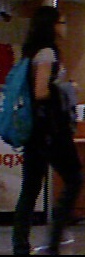

229 222 314 479
frame- 13
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1 25  1 57] result: 6
        name          val    a    b    c    d
2  crop2.png  1200.940048  237  227  335  478
0  crop0.png  5743.770190  507  159  630  476
3  crop3.png  7267.756187  232  272  285  371
1  crop1.png  8739.032269  470  304  502  400
4  crop4.png  8782.972845  459  320  476  383
5  crop5.png  8805.556200  317  269  380  318


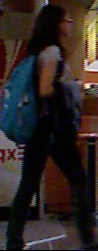

237 227 335 478
frame- 14
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1  1 25 57] result: 6
        name          val    a    b    c    d
2  crop2.png  1059.307793  239  235  352  476
0  crop0.png  5723.313376  501  164  634  474
4  crop4.png  7429.855046  238  276  291  372
1  crop1.png  8772.060590  470  304  501  399
3  crop3.png  8828.950447  457  319  475  383
5  crop5.png  8835.970745  320  267  383  318


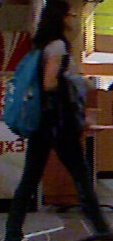

239 235 352 476
frame- 15
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1  1 29 27 57] result: 7
        name          val    a    b    c    d
2  crop2.png   917.725994  245  238  365  476
0  crop0.png  5787.756474  493  160  627  475
4  crop4.png  7476.715656  364  318  447  410
5  crop5.png  7832.024962  253  284  299  376
1  crop1.png  8763.355807  470  304  502  406
6  crop6.png  8814.772657  324  269  380  321
3  crop3.png  8837.297268  458  318  474  381


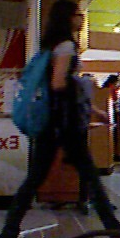

245 238 365 476
frame- 16
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1  1 29 57] result: 6
        name          val    a    b    c    d
2  crop2.png  1048.680123  250  239  361  473
0  crop0.png  5566.174988  490  153  622  479
4  crop4.png  7515.407308  370  320  447  411
1  crop1.png  8693.971647  470  304  501  409
5  crop5.png  8722.603854  329  269  382  323
3  crop3.png  8772.878205  456  320  474  380


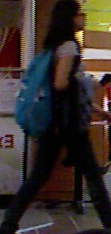

250 239 361 473
frame- 17
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1  1 27 27] result: 6
        name          val    a    b    c    d
1  crop1.png  1241.362961  255  243  387  474
0  crop0.png  5012.661369  480  153  605  469
4  crop4.png  7387.531117  281  285  324  375
5  crop5.png  8023.744138  563  277  591  344
2  crop2.png  8107.260820  469  303  499  407
3  crop3.png  8187.815154  455  320  474  381


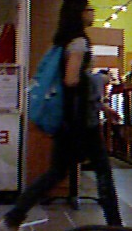

255 243 387 474
frame- 18
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1  1 27 29] result: 6
        name          val    a    b    c    d
2  crop2.png  1014.923150  269  237  388  474
0  crop0.png  4083.497765  479  156  597  471
5  crop5.png  7858.630161  369  318  446  412
4  crop4.png  8573.300240  289  289  330  372
1  crop1.png  9059.360794  469  306  498  404
3  crop3.png  9182.778011  456  320  472  383


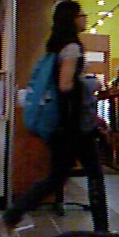

269 237 388 474
frame- 19
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1  1 27] result: 5
        name          val    a    b    c    d
2  crop2.png  2314.611198  303  241  390  465
0  crop0.png  4438.294605  476  152  592  468
4  crop4.png  6226.603488  477  221  555  326
1  crop1.png  8474.654152  468  311  498  401
3  crop3.png  8590.639499  453  320  472  388


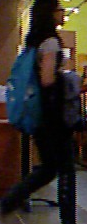

303 241 390 465
frame- 20
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1 27  1 25] result: 6
        name          val    a    b    c    d
1  crop1.png   737.093617  314  234  395  471
5  crop5.png  5296.333354  313  278  364  377
0  crop0.png  5462.668579  466  153  582  471
3  crop3.png  6304.848135  542  276  576  344
2  crop2.png  6522.252525  468  317  497  401
4  crop4.png  6624.197461  452  321  470  389


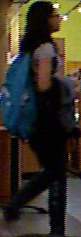

314 234 395 471
frame- 21
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1  1 27] result: 5
        name          val    a    b    c    d
1  crop1.png  1409.554185  339  246  407  470
4  crop4.png  3987.474138  460  226  543  325
0  crop0.png  5979.913043  456  151  575  472
3  crop3.png  6253.429059  466  322  492  392
2  crop2.png  6297.985869  452  320  473  387


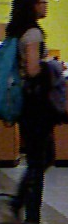

339 246 407 470
frame- 22
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1 27 27] result: 5
        name          val    a    b    c    d
1  crop1.png   891.936096  345  235  413  472
4  crop4.png  3264.885756  456  228  545  325
3  crop3.png  4749.217620  328  277  373  367
2  crop2.png  5303.737739  452  319  473  391
0  crop0.png  7009.818614  453  145  572  474


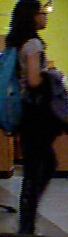

345 235 413 472
frame- 23
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1 27 25] result: 4
        name          val    a    b    c    d
1  crop1.png  1430.068530  352  232  434  472
2  crop2.png  3140.562370  448  230  529  334
3  crop3.png  4909.382344  339  280  390  369
0  crop0.png  7022.718348  440  152  563  471


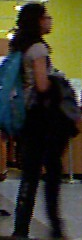

352 232 434 472
frame- 24
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[1 1] result: 2
        name          val    a    b    c    d
1  crop1.png  1775.633971  355  239  459  475
0  crop0.png  6825.099047  433  145  558  474


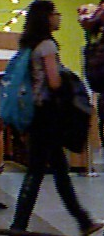

355 239 459 475
frame- 25
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[1 1] result: 2
        name          val    a    b    c    d
1  crop1.png  1224.691798  359  244  467  474
0  crop0.png  5378.200350  432  144  551  473


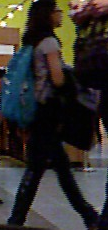

359 244 467 474
frame- 26
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[1 1] result: 2
        name          val    a    b    c    d
1  crop1.png  8854.892828  519  313  546  396
0  crop0.png  8921.135466  367  145  535  474


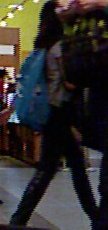

359 244 467 474
frame- 27
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1 57 25] result: 4
        name          val    a    b    c    d
0  crop0.png  6655.411933  375  140  523  474
3  crop3.png  8761.343961  432  194  491  236
1  crop1.png  8800.282950  516  314  542  394
2  crop2.png  8868.344208  321  266  382  321


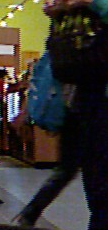

359 244 467 474
frame- 28
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1 27] result: 3
        name          val    a    b    c    d
0  crop0.png  5582.988984  383  136  517  476
2  crop2.png  8049.629060  394  307  433  375
1  crop1.png  8677.556108  513  312  537  395


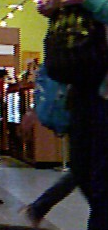

359 244 467 474
frame- 29
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1 27 27 57] result: 5
        name          val    a    b    c    d
2  crop2.png  6146.269763  392  226  454  326
0  crop0.png  6605.503160  376  135  508  478
3  crop3.png  8031.773279  448  264  502  342
4  crop4.png  8652.283398  321  267  383  325
1  crop1.png  8683.164458  511  312  538  395


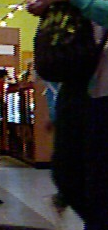

359 244 467 474
frame- 30
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1 27 25] result: 4
        name           val    a    b    c    d
2  crop2.png   7725.800800  382  233  447  325
0  crop0.png   7989.132556  365  125  522  474
3  crop3.png  10254.400909  409  188  471  235
1  crop1.png  10268.595133  507  315  536  395


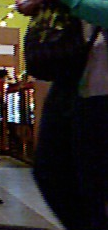

359 244 467 474
frame- 31
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1 27 27] result: 4
        name           val    a    b    c    d
0  crop0.png   6137.421446  368  123  506  471
2  crop2.png   9847.521516  377  229  441  324
3  crop3.png  11223.156508  430  199  487  349
1  crop1.png  12457.016497  507  315  536  395


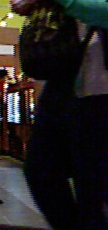

359 244 467 474
frame- 32
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1 27  1 25] result: 5
        name           val    a    b    c    d
0  crop0.png   6479.594123  357  125  496  477
1  crop1.png  11439.380359  475  302  528  475
2  crop2.png  12866.463617  421  251  482  343
3  crop3.png  13628.241046  509  317  533  395
4  crop4.png  13772.179130  394  187  456  229


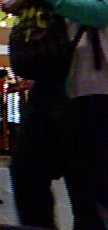

359 244 467 474
frame- 33
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1 25 25] result: 4
        name           val    a    b    c    d
0  crop0.png   5491.859612  353  121  483  477
1  crop1.png  12907.028938  474  256  536  471
2  crop2.png  13406.170445  480  301  529  399
3  crop3.png  15195.378508  392  186  448  231


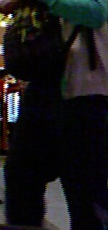

359 244 467 474
frame- 34
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1 27 27 57] result: 5
        name           val    a    b    c    d
0  crop0.png   5392.558113  342  121  469  478
1  crop1.png  12661.336343  456  250  567  472
2  crop2.png  13073.217240  340  213  417  318
4  crop4.png  14671.256797  302  345  360  450
3  crop3.png  15823.013367  456  296  486  373


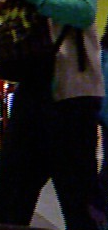

359 244 467 474
frame- 35
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1 27 27] result: 4
        name           val    a    b    c    d
0  crop0.png   4961.333893  335  126  465  473
2  crop2.png  13507.844758  338  208  418  322
1  crop1.png  13772.628072  453  254  575  472
3  crop3.png  16401.920131  451  297  491  373


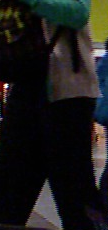

359 244 467 474
frame- 36
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1 27 25] result: 4
        name           val    a    b    c    d
0  crop0.png   6236.385492  321  123  462  477
2  crop2.png  12781.660925  325  221  392  327
1  crop1.png  13779.766761  452  255  574  472
3  crop3.png  15634.314983  460  290  511  375


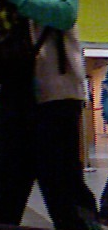

359 244 467 474
frame- 37
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1 66 25] result: 4
        name           val    a    b    c    d
0  crop0.png   8146.392023  307  123  460  476
1  crop1.png  12299.398197  455  253  575  474
3  crop3.png  14124.916318  468  297  515  376
2  crop2.png  14581.055106  311  236  333  256


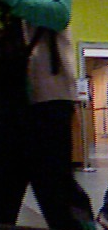

359 244 467 474
frame- 38
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1 66  1] result: 4
        name           val    a    b    c    d
0  crop0.png   8075.559176  298  117  436  477
1  crop1.png  11145.548125  462  253  573  470
3  crop3.png  13426.357920  474  313  497  396
2  crop2.png  13518.563829  297  235  320  253


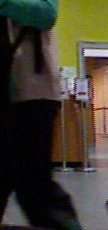

359 244 467 474
frame- 39
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1 27] result: 4
        name           val    a    b    c    d
3  crop3.png   5445.029293  300  200  391  330
1  crop1.png   6672.398444  472  255  573  470
2  crop2.png   9524.246794  471  312  496  397
0  crop0.png  10601.494470  290  116  425  477


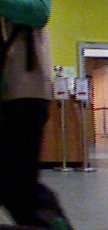

359 244 467 474
frame- 40
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1 27] result: 4
        name           val    a    b    c    d
1  crop1.png   4820.373533  492  257  577  470
3  crop3.png   5195.062656  283  223  348  321
2  crop2.png   7893.024262  469  311  498  399
0  crop0.png  10119.396029  282  117  406  475


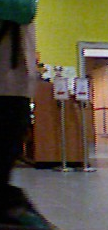

359 244 467 474
frame- 41
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1  1 27] result: 5
        name           val    a    b    c    d
1  crop1.png   3225.890575  499  248  579  470
4  crop4.png   3794.414579  276  189  370  321
2  crop2.png   5899.337420  468  311  496  396
3  crop3.png   5920.604699  490  318  514  392
0  crop0.png  13240.269824  273  107  398  478


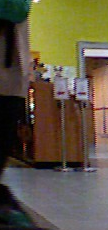

359 244 467 474
frame- 42
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1  1 25] result: 5
        name           val    a    b    c    d
1  crop1.png   3168.950299  515  250  593  473
4  crop4.png   5219.182311  512  294  554  365
2  crop2.png   5392.414116  468  309  496  396
3  crop3.png   5512.722376  489  317  513  392
0  crop0.png  13774.032707  262  109  383  474


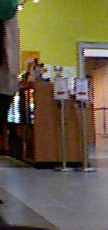

359 244 467 474
frame- 43
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1  1 25 66 25] result: 7
        name           val    a    b    c    d
1  crop1.png   4046.876697  518  249  595  472
4  crop4.png   5162.252125  517  293  560  368
6  crop6.png   5307.029018  554  309  601  378
2  crop2.png   5307.760356  467  310  495  395
3  crop3.png   5489.552623  489  318  512  392
5  crop5.png   5634.836289  255  225  279  243
0  crop0.png  15447.347021  251  105  379  477


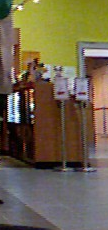

359 244 467 474
frame- 44
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1  1 25 25] result: 6
        name           val    a    b    c    d
1  crop1.png   4393.867431  524  251  609  472
4  crop4.png   5118.996581  525  295  571  372
2  crop2.png   5296.888898  467  310  495  394
5  crop5.png   5386.783270  567  316  615  387
3  crop3.png   5467.264764  488  320  513  394
0  crop0.png  17153.857321  229   99  362  476


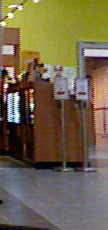

359 244 467 474
frame- 45
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1  1 25] result: 5
        name           val    a    b    c    d
1  crop1.png   4132.013311  525  253  620  471
4  crop4.png   4975.715024  526  295  577  375
2  crop2.png   5247.413268  468  311  494  395
3  crop3.png   5403.202014  488  318  512  394
0  crop0.png  16922.519050  231  101  358  476


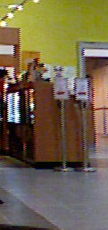

359 244 467 474
frame- 46
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1  1 25 31] result: 6
        name           val    a    b    c    d
1  crop1.png   3997.291083  527  256  632  472
4  crop4.png   4883.021401  534  293  588  374
2  crop2.png   5138.277922  466  313  496  397
5  crop5.png   5288.571641  547  462  640  476
3  crop3.png   5385.467204  486  317  505  388
0  crop0.png  15958.511146  219   97  352  475


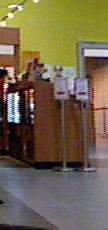

359 244 467 474
frame- 47
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1 25 27 29 39] result: 7
        name           val    a    b    c    d
1  crop1.png   4104.177506  523  257  636  472
5  crop5.png   4199.071445  368  312  447  413
3  crop3.png   4918.779117  540  298  596  376
2  crop2.png   5120.797008  467  312  501  396
4  crop4.png   5510.638439  225  215  309  318
6  crop6.png   5543.315705  479  296  548  311
0  crop0.png  15681.603872  215   97  347  473


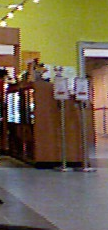

359 244 467 474
frame- 48
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1 25 27 57] result: 6
        name           val    a    b    c    d
0  crop0.png   3579.697194  531  259  636  471
3  crop3.png   4941.244985  553  296  601  373
5  crop5.png   5067.887430  325  270  382  321
2  crop2.png   5097.799721  464  313  498  396
4  crop4.png   5196.223436  208  191  300  322
1  crop1.png  16009.315757  199  106  338  473


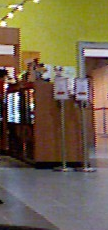

359 244 467 474
frame- 49
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1 25 27 27] result: 6
        name           val    a    b    c    d
1  crop1.png   3410.349542  546  259  636  471
3  crop3.png   4971.852974  559  297  607  373
2  crop2.png   5162.750236  465  314  497  395
4  crop4.png   5268.373753  201  212  279  322
5  crop5.png   5339.101610  610  327  636  389
0  crop0.png  16816.390338  195  100  326  478


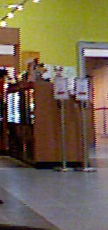

359 244 467 474
frame- 50
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1 27 25 32 27] result: 7
        name           val    a    b    c    d
1  crop1.png   3463.433123  556  258  637  469
4  crop4.png   4887.129833  561  300  614  374
3  crop3.png   5006.862890  183  213  261  319
2  crop2.png   5144.906413  466  314  496  399
6  crop6.png   5338.378593  612  317  640  381
5  crop5.png   5374.016933  566  460  638  473
0  crop0.png  17365.611478  175   98  316  476


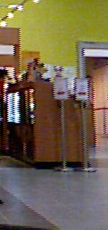

359 244 467 474
frame- 51
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[ 1  1  1 27 32 25] result: 6
        name           val    a    b    c    d
1  crop1.png   3648.751293  565  256  636  466
5  crop5.png   4959.131174  566  298  612  372
3  crop3.png   4980.777550  175  209  252  322
2  crop2.png   5162.193720  465  315  495  395
4  crop4.png   5308.705115  566  459  639  475
0  crop0.png  17491.561680  170   98  311  478


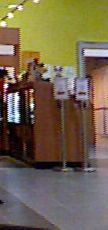

359 244 467 474


In [ ]:
max_frame   = 51
similarity  = 3000

# ================================= no edit ================================= #
axes_export = []
result_axes = []
a = 0
b = 0
c = 0
d = 0

data = {
    'name': [],
    'val':  [],
    'a':    [],
    'b':    [],
    'c':    [],
    'd':    []
    }

def L2Norm(H1,H2):
    distance =0
    for i in range(len(H1)):
        distance += np.square(H1[i]-H2[i])
    return np.sqrt(distance)

# inisiasi box awal (ground truth)
cust_img    = cv2.imread(dir_rgb + img_rgb[0])
gt0         = ground_truth[0]
cut_img     = cust_img[gt0[1]: gt0[1] + gt0[3],gt0[0]: gt0[0] + gt0[2]]

cv2.imwrite('tracker.png', cut_img)
# end inisiasi

for i in range(max_frame):
  print('frame-', i+1)

  # Run detection
  image = skimage.io.imread(dir_rgb + img_rgb[i])
  results = model.detect([image], verbose=1)
  r = results[0]
  # end detection

  for o in range(len(r['rois'])):
    y1 = r['rois'][o][1]
    x1 = r['rois'][o][0]
    y2 = r['rois'][o][3]
    x2 = r['rois'][o][2]

    result_axes.append([y1, x1, y2, x2])
    
  print(r['class_ids'], 'result: ' + str(o + 1))

  # MAIN FUNCTION TRACKING
  img         = cv2.imread(dir_rgb + img_rgb[i])
  tracker     = Image.open('tracker.png')
  tracker_arr = np.asarray(tracker)
  tracker_fla = tracker_arr.flatten()

  for o in range(len(r['rois'])):
    crop          = img[result_axes[o][1]:result_axes[o][3],result_axes[o][0]:result_axes[o][2]]
    imgname       = 'crop'+ str(o) + '.png'
    cv2.imwrite(imgname, crop)
    time.sleep(0.5)

    target        = Image.open(imgname)
    target_arr    = np.asarray(target)
    target_fla    = target_arr.flatten()

    RH1           = Counter(tracker_fla)
    RH2           = Counter(target_fla)

    H1 = []
    for p in range(256):
        if p in RH1.keys():
            H1.append(RH1[p])
        else:
            H1.append(0)

    H2 = []
    for p in range(256):
        if p in RH2.keys():
            H2.append(RH2[p])
        else:
            H2.append(0)

    data['name'].append(imgname)
    data['val'].append(L2Norm(H1,H2))
    data['a'].append(result_axes[o][0])
    data['b'].append(result_axes[o][1])
    data['c'].append(result_axes[o][2])
    data['d'].append(result_axes[o][3])
    df = pd.DataFrame(data)
    # cv2_imshow(crop)

  df.sort_values(by=['val'], inplace=True)
  print(df)

  if df.iat[0,1] <= similarity:
    a = df.iat[0,2]
    b = df.iat[0,3]
    c = df.iat[0,4]
    d = df.iat[0,5]

    cust_img    = cv2.imread(dir_rgb + img_rgb[i])
    cut_img     = cust_img[b:d, a:c]
    cv2_imshow(cut_img)
    cv2.imwrite('tracker.png', cut_img)

  for o in range(len(r['rois'])):
    result_axes.pop(0)
    try:
      os.remove('crop' + str(o) + '.png')
    except OSError:
      pass
  
  print(a, b, c, d)

  axes_export.append([a, b, c-a, d-b])
  data = {
    'name': [],
    'val':  [],
    'a':    [],
    'b':    [],
    'c':    [],
    'd':    []
    }

  print("=========================================================================================================")

  # END TRACKING FUNCTION

# trial

In [ ]:
import pandas as pd
data = {
    'name': [],
    'val':  [],
    'a':    [],
    'b':    [],
    'c':    [],
    'd':    []
    }

df = pd.DataFrame(data)

df.sort_values(by=['val'], inplace=True)
print(df)
print("")


Empty DataFrame
Columns: [name, val, a, b, c, d]
Index: []



In [ ]:
data['name'].append('cut3.png')
data['val'].append(random.randint(0,10))
data['a'].append(random.randint(0,10))
data['b'].append(random.randint(0,10))
data['c'].append(random.randint(0,10))
data['d'].append(random.randint(0,10))

df = pd.DataFrame(data)
print(df)

       name  val  a  b   c   d
0  cut2.png    0  8  6   6   1
1  cut1.png    3  1  8   8   3
2  cut0.png    3  1  1   0  10
3  cut3.png    1  9  5  10   1


In [ ]:
df.sort_values(by=['val'], inplace=True)
print(df)

       name  val  a  b   c   d
0  cut2.png    0  8  6   6   1
3  cut3.png    1  9  5  10   1
1  cut1.png    3  1  8   8   3
2  cut0.png    3  1  1   0  10


In [ ]:
df['val'][1] = 1

print(df)

      name  val  a  b   c  d
3  lintang    0  1  5   9  3
2  lintang    0  2  2   7  5
0  lintang    9  3  6   4  2
1  lintang    1  4  8   5  5
4  lintang    0  5  6  10  2
5  lintang    0  7  2   9  6


In [ ]:
from google.colab import output

# ================================= no edit ================================= #

data = {
    'name': [],
    'val':  [],
    'a':    [],
    'b':    [],
    'c':    [],
    'd':    []
    }

font            = cv2.FONT_HERSHEY_SIMPLEX
font_size       = 0.5
font_color      = (255,255,0)
font_thickness  = 1

for u in range(2):
  print('frame-' + str(u + 1))
  image = skimage.io.imread(os.path.join(dir_rgb + img_rgb[u]))

  results = model.detect([image], verbose=1)
  r = results[0]

  img = cv2.imread(dir_rgb + img_rgb[u])

  for i in range(len(r['rois'])):
    x = r['rois'][i][1]
    y = r['rois'][i][0] + 12
    text = class_names[r['class_ids'][i]]

    img_text = cv2.putText(img, text, (x,y), font, font_size, font_color, font_thickness, cv2.LINE_AA)
    cv2.rectangle(img, (r['rois'][i][1], r['rois'][i][0]), (r['rois'][i][3], r['rois'][i][2]), (255, 255, 0), 1)

    data['name'].append('cut' + str(i) + '.png')
    data['val'].append(0)
    data['a'].append(r['rois'][i][1])
    data['b'].append(r['rois'][i][0])
    data['c'].append(r['rois'][i][3])
    data['d'].append(r['rois'][i][2])

    df = pd.DataFrame(data)
  
  print(df)
  data = {
    'name': [],
    'val':  [],
    'a':    [],
    'b':    [],
    'c':    [],
    'd':    []
    }
  cv2.rectangle(img, (ground_truth[u][0], ground_truth[u][1]), (ground_truth[u][2] + ground_truth[u][0], ground_truth[u][3] + ground_truth[u][1]), (0, 26, 255), 2)
  cv2_imshow(img)



In [ ]:
print(data)

{'name': [], 'val': [], 'a': [], 'b': [], 'c': [], 'd': []}


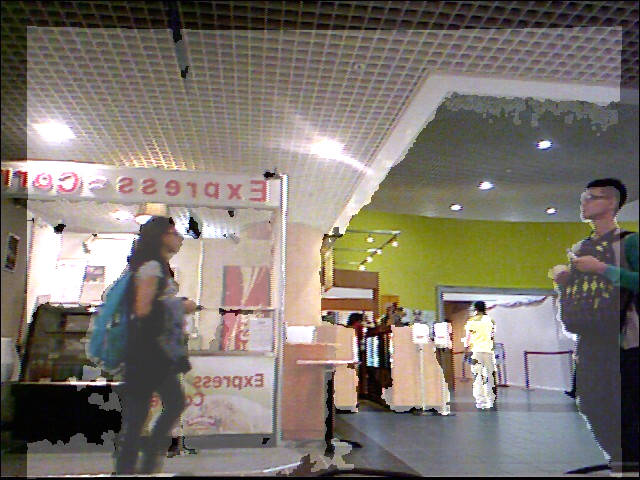

In [ ]:
myrgb   = cv2.imread(dir_rgb + img_rgb[0])
mydepth = cv2.imread(dir_d + img_d[0])

myfussion = cv2.addWeighted(myrgb, 1, mydepth, 0.6,1)

cv2_imshow(myfussion)